In [1]:
from helpers_processing import json_to_csv, unique_display_link, remove_most_popular, expand_labels, unique_display_link_prediction
from helpers_classification import data_preparation, training, compute_nb_errors, predict
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from torch import nn, argmax
import torch
sns.set_style("white")

## Processing Pipeline

In [2]:
json_to_csv('../data/google.json', '../data/data_processed.csv')

unique_display_link('../data/data_processed.csv', '../data/unique_displayLink.csv')

remove_most_popular('../data/unique_displayLink.csv', '../data/drug_websites_filtered.csv','../data/top-1m.csv')

expand_labels('../data/labelled_unique.csv', '../data/data_processed.csv', '../data/labelled_expanded.csv')

## Exploration

In [3]:
df = pd.read_csv('../data/labelled_expanded.csv', index_col='link')

In [4]:
print("""There are a total of {} links listed of which {} are labelled. {} labelled are not webshops, {}
are webshops and {} are dead links.""".format(len(df), 
                                                           len(df[~df['label'].isnull()]),\
                                                           len(df[df['label'] == 0.0]),\
                                                           len(df[df['label'] == 1.0]),\
                                                           len(df[df['label'] == 2.0])))

There are a total of 510192 links listed of which 122968 are labelled. 43548 labelled are not webshops, 37090
are webshops and 42330 are dead links.


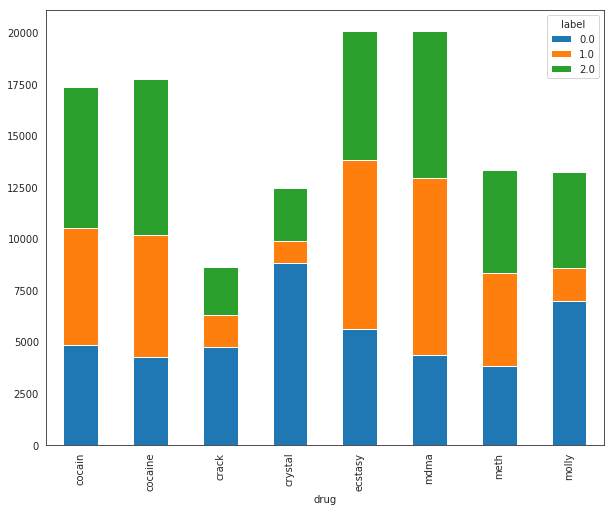

In [5]:
df.groupby(['drug','label']).size().unstack().plot(kind='bar', stacked=True, figsize=(10,8));
plt.savefig('../figures/drug_distribution.eps',format='eps')

From the above plot we can see that for the words 'crack', 'crystal' and 'molly there are many false positives and little true positives.

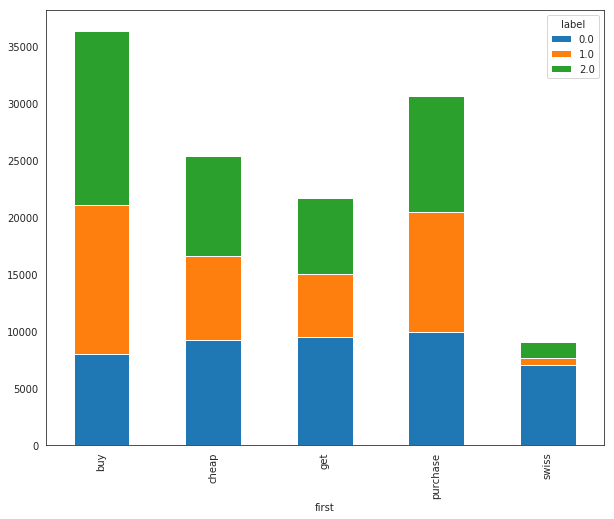

In [6]:
df.groupby(['first','label']).size().unstack().plot(kind='bar', stacked=True, figsize=(10,8));
plt.savefig('../figures/first_distribution.eps',format='eps')

We can see that the word 'swiss' has almost no true positives.

## Classification Pipeline

In [7]:
x_train,y_train,x_test,y_test,unlabelled_data,unlabelled = data_preparation('../data/labelled_expanded.csv')

In [8]:
model = nn.Sequential(
        nn.Linear(10000, 32),
        nn.ReLU(),
        nn.Dropout(0.2),
        nn.Linear(32, 64),
        nn.ReLU(),
        nn.Dropout(0.2),
        nn.Linear(64, 32),
        nn.Dropout(0.2),
        nn.ReLU(),
        nn.Linear(32,2))

In [9]:
training(model, x_train, y_train)

Epoch: 0
Epoch: 10
Epoch: 20
Epoch: 30
Epoch: 40
Epoch: 50
Epoch: 60
Epoch: 70
Epoch: 80
Epoch: 90


In [10]:
print(compute_nb_errors(model, x_train, y_train) / x_train.size(0) * 100)
print(compute_nb_errors(model, x_test, y_test) / x_test.size(0) * 100)

0.0
0.0625


In [11]:
torch.save(model, '../models/mlp.pt')

In [12]:
model = torch.load('../models/mlp.pt')

In [13]:
unique_display_link_prediction('../data/labelled_prediction_expanded.csv',
                               '../data/labelled_prediction_unique.csv')

In [14]:
df = pd.read_csv('../data/labelled_prediction_unique.csv', index_col='displayLink')

## Exploring the predictions

In [15]:
df[df['label']==1].head(10)

,text,first,drug,count,label,ratio,label_count
displayLink,,,,,,,
methamphetamina.blogspot.com,How to purchase amphetamine online How to purc...,purchase,meth,558,1,1.0,558
australianice.wordpress.com,100% pure research chems lab – Buy %100 pure c...,buy,meth,162,1,1.0,162
eliminate-mdma-ecstasy-for-sale.blogspot.com,Cheap MDMA and Ecstasy Party Pills For Sale On...,purchase,molly,162,1,1.0,162
buymyweedonline.ca,Gods Green Crack Honey Comb Budder (AAAAA) | B...,buy,crack,149,1,1.0,149
www.usonlineads.com,Buy Ecstasy Online - Everything Else - Delawar...,cheap,ecstasy,119,1,1.0,119
www.planetorganic.com,Add some Raw Ecstasy activated nuts and butter...,buy,ecstasy,109,1,1.0,109
buy-cheap-mdma-ecstasy-online.tumblr.com,Cheap MDMA and Ecstasy Pills For Sale Online C...,cheap,mdma,105,1,1.0,105
purecrystalmethforsaleonline.blogspot.com,"PURE CRYSTAL METHAMPHETAMINE, ICE METH SHARD F...",purchase,meth,104,1,1.0,104
methamphetaminecrystal.blogspot.com,where can i buy crystal meth in Australia wher...,purchase,meth,102,1,1.0,102


In [16]:
df[df['label']==0].tail(10)

,text,first,drug,count,label,ratio,label_count
displayLink,,,,,,,
ch.bucherer.com,Discover sophisticated watches and exquisite j...,swiss,molly,2,0,0.0,0
new.abb.com,ABB is a pioneering technology leader that wor...,swiss,molly,2,0,0.0,0
www.herworld.com,"Sep 1, 2016 ... From classic vanilla (Flor Pat...",swiss,molly,42,0,0.0,0
www.moneysavingexpert.com,"Mar 22, 2018 ... To give you a head start, we'...",swiss,molly,98,0,0.0,0
www.brunomagli.com,Shop current Bruno Magli styles & find new sty...,swiss,molly,19,0,0.0,0
www.grundycountyherald.com,"Sep 3, 2018 ... On August 29, 2018, Graham Mit...",swiss,molly,71,0,0.0,0
www.phmc.pa.gov,PHMC > Archives > Research Online > Ships Pass...,swiss,molly,7,0,0.0,0
www.originalswissaromatics.com,Original Swiss Aromatics provides essential oi...,swiss,molly,13,0,0.0,0
www.swisssense.nl,De boxspring- en matrassencollectie bestaan ui...,swiss,molly,17,0,0.0,0
